#### Model relative permeability and module testing

In [1]:
import pnm
import numpy as np
import kr_model
import matplotlib.pyplot as plt

im = np.load('1.npy')
data = pnm.pnm(im)
data_model = kr_model.main(data)

print('The irreducible water saturation is {}'.format(data_model['swir']))
print('The residual air saturation is {}'.format(data_model['snwr']))
print('The end point relative permeability of water is {}'.format(data_model['krw_o']))
print('The end point relative permeability of air is {}'.format(data_model['krnw_o']))

------------------------------------------------------------
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  249
Peaks after trimming saddle points:  143
Peaks after trimming nearby peaks:  143
------------------------------------------------------------
Extracting pore and throat information from image
100%|██████████| 243/243 [00:01<00:00, 211.61it/s]


------------------------------------------------------------
SOURCE     : openpnm.algorithms.OrdinaryPercolation.get_intrusion_data 
TIME STAMP : 2022-08-23 17:24:11,496
------------------------------------------------------------


The irreducible water saturation is 0.3879320550020915
The residual air saturation is 0
The end point relative permeability of water is 1
The end point relative permeability of air is 0.8446846000659517


* analyze end point and irreducible saturation
* plot relative permeability curves

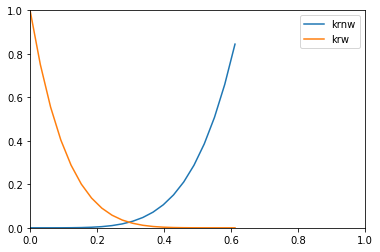

In [2]:
#%% plot kr curves
f = plt.figure()
plt.plot(data_model['data.model']['snw_tnw'],data_model['data.model']['krnw'],label='krnw')
plt.plot(data_model['data.model']['snw_tw'],data_model['data.model']['krw'],label='krw')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()

In [6]:
data_model['data.model'].describe()

,snw_tnw,krnw,snw_tw,krw
count,21.000000,21.000000,21.000000,21.000000
mean,0.306034,0.159096,0.306034,0.169705
std,0.189889,0.244382,0.189889,0.281680
min,0.000000,0.000000,0.000000,0.000000
25%,0.153017,0.001056,0.153017,0.000438
50%,0.306034,0.029863,0.306034,0.020939
75%,0.459051,0.210981,0.459051,0.200970
max,0.612068,0.844685,0.612068,1.000000


In [8]:
data_model['data.model']['krnw'].max()

0.8446846000659517